In [ ]:
from functions import Tracklist
from utils import Utils
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
artist_details = Utils.get_artist_details("Gazo", "artist.getSimilar")
artist_details

{'similarartists': {'artist': [{'name': 'Tiakola',
    'match': '1',
    'url': 'https://www.last.fm/music/Tiakola',
    'image': [{'#text': 'https://lastfm.freetls.fastly.net/i/u/34s/2a96cbd8b46e442fc41c2b86b821562f.png',
      'size': 'small'},
     {'#text': 'https://lastfm.freetls.fastly.net/i/u/64s/2a96cbd8b46e442fc41c2b86b821562f.png',
      'size': 'medium'},
     {'#text': 'https://lastfm.freetls.fastly.net/i/u/174s/2a96cbd8b46e442fc41c2b86b821562f.png',
      'size': 'large'},
     {'#text': 'https://lastfm.freetls.fastly.net/i/u/300x300/2a96cbd8b46e442fc41c2b86b821562f.png',
      'size': 'extralarge'},
     {'#text': 'https://lastfm.freetls.fastly.net/i/u/300x300/2a96cbd8b46e442fc41c2b86b821562f.png',
      'size': 'mega'},
     {'#text': 'https://lastfm.freetls.fastly.net/i/u/300x300/2a96cbd8b46e442fc41c2b86b821562f.png',
      'size': ''}],
    'streamable': '0'},
   {'name': 'Ninho',
    'match': '0.944633',
    'url': 'https://www.last.fm/music/Ninho',
    'image': [{'#t

#### Visualize data (without scaling)

In [207]:
def view_table(table_name='tracks_history', db_name='spotify_project.db'):
    conn = sqlite3.connect(db_name)
    df = pd.read_sql(f"SELECT * FROM {table_name}", conn)
    conn.close()
    return df

In [430]:
dataset_list = []
playlist_names = ['playlist_drill', 'playlist_house', 'playlist_rap_us', 'playlist_afrobeat', 'playlist_annees_80']
playlist_names = ['playlist_rap_us']
for playlist_name in playlist_names:
    playlist = view_table(table_name=playlist_name)
    dataset_list.append(playlist)
dataset = pd.concat(dataset_list, axis=0, ignore_index=True)
dataset['release_date'] = pd.to_datetime(dataset['release_date'], errors='coerce')

In [431]:
dataset

album_id               album_name release_date  \
0    4MZnolldq7ciKKlbVDzLm5           Meet The Woo 2   2020-02-07   
1    26ztFK3E69j5THJQdyxC5w             Die A Legend   2019-06-07   
2    2yXnY2NiaZk9QiJJittS81              Drip Harder   2018-10-05   
3    1n5t4LXCTAmiJmyMtbBxVU           Faith (Deluxe)   2021-07-31   
4    26AI9lGjmJqrak9GWUdBwN        Broken Symphonies   2024-07-26   
..                      ...                      ...          ...   
274  3z6bAthm29t6LvndcdfVnV         Crunk Ain't Dead   2019-12-09   
275  7D2NdGvBHIavgLhmcwhluK                   Yeezus   2013-06-18   
276  6tkjU4Umpo79wwkgPMV3nZ  Goodbye & Good Riddance   2018-12-10   
277  6tkjU4Umpo79wwkgPMV3nZ  Goodbye & Good Riddance   2018-12-10   
278  44va7sFuK8IGzrj0BIX8kK           Brightest Blue   2020-07-16   

                                   album_artists_id album_artists_name  \
0                            0eDvMgVFoNV3TpwtrVCoTj          Pop Smoke   
1                            6AgTAQt8XS6jRWi4sX7w49             Polo G   
2    5f7VJjfbwm532GiveGC0ZK, 2hlmm7s2ICUX0LVIhVFlZQ    Lil Baby, Gunna   
3                            0eDvMgVFoNV3TpwtrVCoTj          Pop Smoke   
4                            1RIO0WcUPQ8HsXH0kdmbzh     Jan Metternich   
..                                              ...                ...   
274                          24zj84GShUIcBQYq6VpOYW         Duke Deuce   
275                          5K4W6rqBFWDnAN6FQUkS6x         Kanye West   
276                          4MCBfE4596Uoi2O4DtmEMz         Juice WRLD   
277                          4MCBfE4596Uoi2O4DtmEMz         Juice WRLD   
278                          0X2BH1fck6amBIoJhDVmmJ     Ellie Goulding   

     duration                track_id                        track_name  \
0     127.546  792HwhrdO3ErRKL5yRe4Ge                        Invincible   
1     166.560  6uFn47ACjqYkc0jADwEdj1          Pop Out (feat. Lil Tjay)   
2     145.542  78QR3Wp35dqAhFEc2qAGjE  Drip Too Hard (Lil Baby & Gunna)   
3     216.387  13bjzSvnVIpsOcmiU8EfKp                              Dior   
4      93.335  0K9iPyJG5wd6MSvEo926dw                DRUGS CANT H3LP ME   
..        ...                     ...                               ...   
274   113.149  4RsTfAuTiUyL7GKGPiNC0w                  Crunk Ain't Dead   
275   229.146  3sNVsP50132BTNlImLx70i                           Bound 2   
276   239.835  285pBltuF7vW8TeWk8hdRR                      Lucid Dreams   
277   165.819  4VXIryQMWpIdGgYR4TrjT1            All Girls Are The Same   
278   188.066  15og0pCEcTFWEXOFKdcJlU                           Hate Me   

     popularity                                track_artists_id  \
0            69                          0eDvMgVFoNV3TpwtrVCoTj   
1            71  6AgTAQt8XS6jRWi4sX7w49, 6jGMq4yGs7aQzuGsMgVgZR   
2            76  5f7VJjfbwm532GiveGC0ZK, 2hlmm7s2ICUX0LVIhVFlZQ   
3            37                          0eDvMgVFoNV3TpwtrVCoTj   
4            42                          1RIO0WcUPQ8HsXH0kdmbzh   
..          ...                                             ...   
274          50                          24zj84GShUIcBQYq6VpOYW   
275          78                          5K4W6rqBFWDnAN6FQUkS6x   
276          81                          4MCBfE4596Uoi2O4DtmEMz   
277          81                          4MCBfE4596Uoi2O4DtmEMz   
278          72  0X2BH1fck6amBIoJhDVmmJ, 4MCBfE4596Uoi2O4DtmEMz   

             track_artists_name track_listeners track_playcount  \
0                     Pop Smoke          356049         4661198   
1              Polo G, Lil Tjay          348178         4068802   
2               Lil Baby, Gunna            None            None   
3                     Pop Smoke          576367         7386639   
4                Jan Metternich            4766           10619   
..                          ...             ...             ...   
274                  Duke Deuce           92721          854018   
275                  Kanye West         1540340        2352

In [432]:
tracklist = Tracklist(dataset)
tracklist_vect = tracklist.vectorize_recent_tracks(n_components=1)
tracklist_vect

popularity  duration track_listeners track_playcount  release_date  \
0            69   127.546          356049         4661198          7342   
1            71   166.560          348178         4068802          7097   
2            76   145.542            None            None          6852   
3            37   216.387          576367         7386639          7882   
4            42    93.335            4766           10619          8973   
..          ...       ...             ...             ...           ...   
274          50   113.149           92721          854018          7282   
275          78   229.146         1540340        23522527          4917   
276          81   239.835         1027383        14450733          6918   
277          81   165.819          770984        13896995          6918   
278          72   188.066          254419         1527199          7502   

     album_id  track_id  similar_artists  track_tags  track_artists_id  \
0         114       246        -0.883880   -0.079235         -0.122360   
1          51       238        -0.040475   -0.545488         -0.623086   
2          76       245         2.381786   -0.359714          0.430568   
3          39        33        -0.883880   -0.079235         -0.122360   
4          50        10        -0.399965    0.676925         -0.059306   
..        ...       ...              ...         ...               ...   
274       103       160        -0.358356    0.143569         -0.057295   
275       182       134        -0.395960    0.127902         -0.057417   
276       174        79        -0.680608    1.339593         -0.147097   
277       174       163        -0.680608    1.339593         -0.147097   
278       108        35        -0.701359    1.450561         -0.151777   

     album_artists_id  
0           -0.013496  
1            0.805994  
2           -0.801076  
3           -0.013496  
4           -0.003028  
..                ...  
274         -0.002896  
275         -0.002907  
276         -0.004550  
277         -0.004550  
278         -0.002775  

[279 rows x 11 columns]

In [433]:
imputer = SimpleImputer(strategy="mean")
tracklist_imputed = pd.DataFrame(imputer.fit_transform(tracklist_vect), columns=tracklist_vect.columns)
tracklist_imputed

popularity  duration  track_listeners  track_playcount  release_date  \
0          69.0   127.546     3.560490e+05        4661198.0        7342.0   
1          71.0   166.560     3.481780e+05        4068802.0        7097.0   
2          76.0   145.542     3.740421e+05        4312180.2        6852.0   
3          37.0   216.387     5.763670e+05        7386639.0        7882.0   
4          42.0    93.335     4.766000e+03          10619.0        8973.0   
..          ...       ...              ...              ...           ...   
274        50.0   113.149     9.272100e+04         854018.0        7282.0   
275        78.0   229.146     1.540340e+06       23522527.0        4917.0   
276        81.0   239.835     1.027383e+06       14450733.0        6918.0   
277        81.0   165.819     7.709840e+05       13896995.0        6918.0   
278        72.0   188.066     2.544190e+05        1527199.0        7502.0   

     album_id  track_id  similar_artists  track_tags  track_artists_id  \
0       114.0     246.0        -0.883880   -0.079235         -0.122360   
1        51.0     238.0        -0.040475   -0.545488         -0.623086   
2        76.0     245.0         2.381786   -0.359714          0.430568   
3        39.0      33.0        -0.883880   -0.079235         -0.122360   
4        50.0      10.0        -0.399965    0.676925         -0.059306   
..        ...       ...              ...         ...               ...   
274     103.0     160.0        -0.358356    0.143569         -0.057295   
275     182.0     134.0        -0.395960    0.127902         -0.057417   
276     174.0      79.0        -0.680608    1.339593         -0.147097   
277     174.0     163.0        -0.680608    1.339593         -0.147097   
278     108.0      35.0        -0.701359    1.450561         -0.151777   

     album_artists_id  
0           -0.013496  
1            0.805994  
2           -0.801076  
3           -0.013496  
4           -0.003028  
..                ...  
274         -0.002896  
275         -0.002907  
276         -0.004550  
277         -0.004550  
278         -0.002775  

[279 rows x 11 columns]

In [434]:
pca = PCA(n_components=2)

reduced_features = pca.fit_transform(tracklist_imputed)

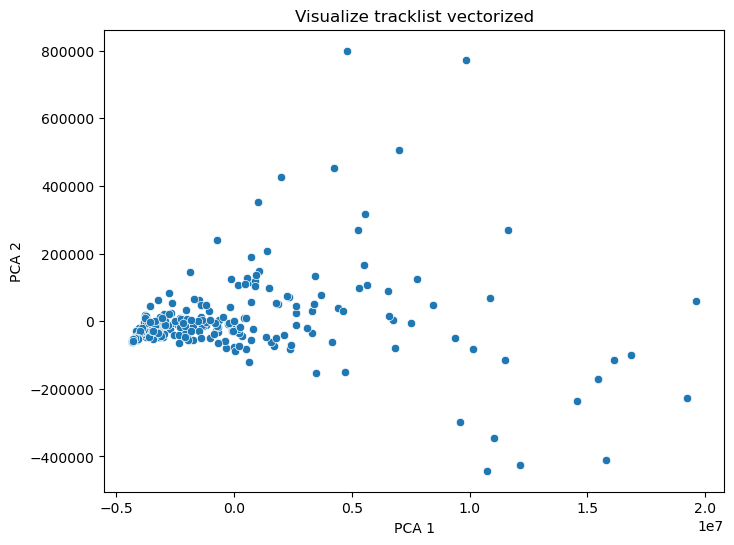

In [435]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = reduced_features[:, 0], y = reduced_features[:, 1])
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Visualize tracklist vectorized")
plt.show()

#### Compare with scaling

In [436]:
tracklist_scaled = tracklist.scale_and_weight(n_components=1)
imputer = SimpleImputer(strategy="mean")
tracklist_imputed = pd.DataFrame(imputer.fit_transform(tracklist_scaled), columns=tracklist_scaled.columns)
tracklist_imputed

popularity  duration  track_listeners  track_playcount  release_date  \
0      0.590298 -1.290683    -4.890976e-02     7.328952e-02      0.201324   
1      0.696895 -0.474353    -7.030508e-02    -5.110648e-02      0.022640   
2      0.963388 -0.914134     7.662716e-17    -4.179663e-17     -0.156043   
3     -1.115261  0.568230     5.499691e-01     6.455991e-01      0.595158   
4     -0.848768 -2.006516    -1.003784e+00    -9.032758e-01      1.390847   
..          ...       ...              ...              ...           ...   
274   -0.422378 -1.591927    -7.647004e-01    -7.261722e-01      0.157565   
275    1.069986  0.835200     3.170286e+00     4.033940e+00     -1.567281   
276    1.229882  1.058857     1.775942e+00     2.128973e+00     -0.107908   
277    1.229882 -0.489857     1.078986e+00     2.012695e+00     -0.107908   
278    0.750194 -0.024360    -3.251652e-01    -5.848124e-01      0.318016   

     album_id  track_id  similar_artists  track_tags  track_artists_id  \
0    0.302599  1.328535        -1.135676   -0.143494         -0.358920   
1   -0.791800  1.229205        -0.052006   -0.987875         -1.827702   
2   -0.357515  1.316119         3.060298   -0.651439          1.262988   
3   -1.000257 -1.316119        -1.135676   -0.143494         -0.358920   
4   -0.809171 -1.601692        -0.513905    1.225906         -0.173964   
..        ...       ...              ...         ...               ...   
274  0.111513  0.260741        -0.460443    0.260002         -0.168064   
275  1.483855 -0.062081        -0.508759    0.231630         -0.168422   
276  1.344883 -0.744973        -0.874497    2.425992         -0.431479   
277  1.344883  0.297989        -0.874497    2.425992         -0.431479   
278  0.198370 -1.291286        -0.901158    2.626955         -0.445209   

     album_artists_id  
0           -0.045159  
1            2.696997  
2           -2.680539  
3           -0.045159  
4           -0.010132  
..                ...  
274         -0.009690  
275         -0.009726  
276         -0.015224  
277         -0.015224  
278         -0.009285  

[279 rows x 11 columns]

In [437]:
pca = PCA(n_components=2)

reduced_features = pca.fit_transform(tracklist_imputed)

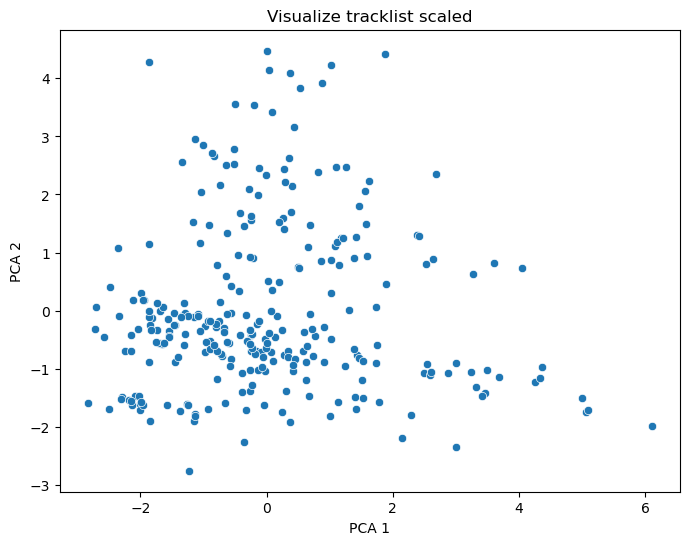

In [438]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = reduced_features[:, 0], y = reduced_features[:, 1])
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Visualize tracklist scaled")
plt.show()

#### Adjust by weighting

In [63]:
tracklist_scaled.columns

Index(['popularity', 'duration', 'track_listeners', 'track_playcount',
       'release_date', 'album_id', 'track_id', 'similar_artists', 'track_tags',
       'track_artists_id', 'album_artists_id'],
      dtype='object')

In [447]:
### Use weights in order to adjust efficiently data

weights = {"album_id": 0, "popularity": 1, "duration": 1,
           "track_listeners": 1, "track_playcount": 0,
           "release_date": 1, "similar_artists": 2,
           "track_id": 0, "track_tags": 0.5, "track_artists_id": 1.5,
           "album_artists_id": 1.5}
tracklist_weighted = tracklist.scale_and_weight(weights=weights, n_components=3)
imputer = SimpleImputer(strategy="mean")
tracklist_imputed = pd.DataFrame(imputer.fit_transform(tracklist_weighted), columns=tracklist_weighted.columns)
tracklist_imputed

popularity  duration  track_listeners  track_playcount  release_date  \
0      0.590298 -1.290683    -4.890976e-02              0.0      0.201324   
1      0.696895 -0.474353    -7.030508e-02             -0.0      0.022640   
2      0.963388 -0.914134     7.662716e-17              0.0     -0.156043   
3     -1.115261  0.568230     5.499691e-01              0.0      0.595158   
4     -0.848768 -2.006516    -1.003784e+00             -0.0      1.390847   
..          ...       ...              ...              ...           ...   
274   -0.422378 -1.591927    -7.647004e-01             -0.0      0.157565   
275    1.069986  0.835200     3.170286e+00              0.0     -1.567281   
276    1.229882  1.058857     1.775942e+00              0.0     -0.107908   
277    1.229882 -0.489857     1.078986e+00              0.0     -0.107908   
278    0.750194 -0.024360    -3.251652e-01             -0.0      0.318016   

     album_id  track_id  similar_artists_1  similar_artists_2  \
0         0.0       0.0          -2.271352           1.655514   
1        -0.0       0.0          -0.104011           4.133105   
2        -0.0       0.0           6.120595          -0.494302   
3        -0.0      -0.0          -2.271352           1.655514   
4        -0.0      -0.0          -1.027810          -1.213905   
..        ...       ...                ...                ...   
274       0.0       0.0          -0.920886          -1.257603   
275       0.0      -0.0          -1.017519          -1.215790   
276       0.0      -0.0          -1.748993          -1.911821   
277       0.0       0.0          -1.748993          -1.911821   
278       0.0      -0.0          -1.802317          -1.979506   

     similar_artists_3  track_tags_1  track_tags_2  track_tags_3  \
0             5.248049     -0.071747     -0.430458     -0.045208   
1            -2.432640     -0.493938     -0.162362      0.817413   
2             1.228978     -0.325720      0.242449     -0.854562   
3             5.248049     -0.071747     -0.430458     -0.045208   
4            -0.151953      0.612953     -0.689323      0.129799   
..                 ...           ...           ...           ...   
274          -0.163980      0.130001     -0.778600     -0.061098   
275          -0.146973      0.115815     -0.642526     -0.090405   
276          -3.171652      1.212996      0.670722      0.152029   
277          -3.171652      1.212996      0.670722      0.152029   
278          -3.335833      1.313478      0.641500      0.153167   

     track_artists_id_1  track_artists_id_2  track_artists_id_3  \
0             -0.538380           -0.820211           -2.794822   
1             -2.741553           -0.579833            3.497710   
2              1.894482            5.397586            0.753821   
3             -0.538380           -0.820211           -2.794822   
4             -0.260946           -0.214497           -0.406767   
..                  ...                 ...                 ...   
274           -0.252097           -0.206428           -0.389046   
275           -0.252634           -0.206965           -0.390388   
276           -0.647219           -0.440345           -0.865671   
277           -0.647219           -0.440345           -0.865671   
278           -0.667814           -0.455788           -0.900470   

     album_artists_id_1  album_artists_id_2  album_artists_id_3  
0             -0.067739           -1.902459           -3.310151  
1              4.045495            1.998113            0.889453  
2             -4.020809            5.190660            0.345020  
3             -0.067739           -1.902459           -3.310151  
4             -0.015199           -0.249103           -0.194106  
..                  ...                 ...                 ...  
274           -0.014535           -0.236988           -0.183922  
275           -0.014589           -0.238062           -0.184889  
276           -0.022836           -0.399329           -0.328232  
277           -0.

In [448]:
pca = PCA(n_components=2)

reduced_features = pca.fit_transform(tracklist_imputed)

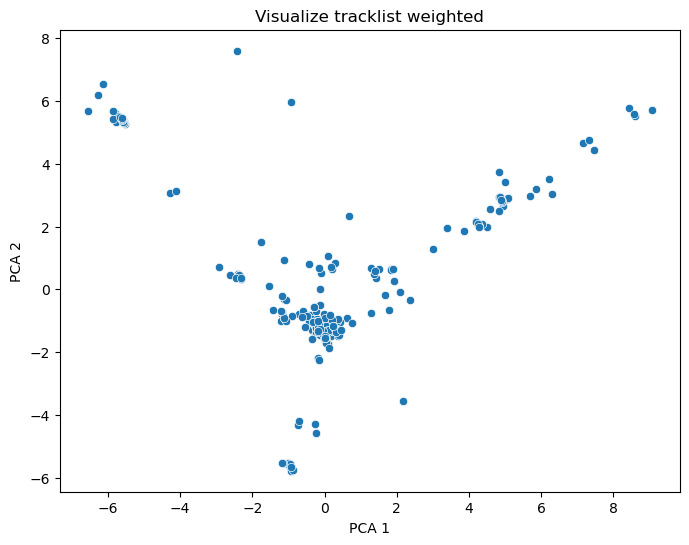

In [449]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = reduced_features[:, 0], y = reduced_features[:, 1])
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Visualize tracklist weighted")
plt.show()

#### Clustering

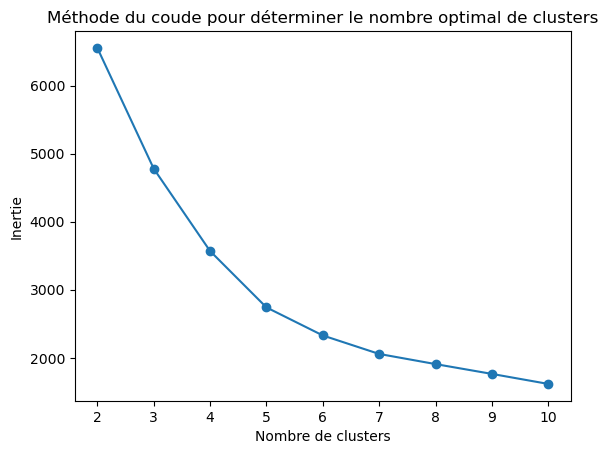

In [450]:
Utils.visualize_clustering(tracklist_imputed, feature=dataset['track_name'])